In [1]:
import cirq_google
import cirq
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_quantum as tfq

import sympy
import random
from itertools import product

# I: Quantum Computing Part

## 1)

In [2]:
circuit = cirq.Circuit()

# a)
qbits = cirq.LineQubit.range(5)

# b)
circuit.append(cirq.H(q) for q in qbits)

# c)
circuit.append([cirq.CNOT(qbits[0],qbits[1]), cirq.CNOT(qbits[1],qbits[2]),
               cirq.CNOT(qbits[2],qbits[3]), cirq.CNOT(qbits[3],qbits[4])])

# d)
circuit.append(cirq.SWAP(qbits[0],qbits[4]))

# e)
circuit.append(cirq.rx(np.pi/2)(qbits[0]))

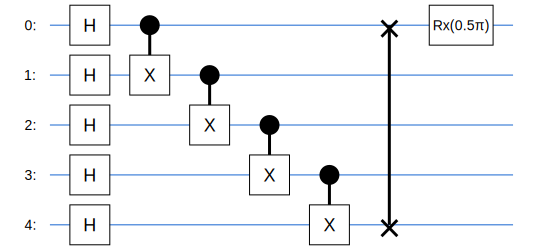

In [3]:
# d)
from cirq.contrib.svg import SVGCircuit
SVGCircuit(circuit)

## 2)

add steps amount of rx rotations which should add up to the angle full_angle

In [4]:
q0 = cirq.NamedQubit("q0")
full_angle = np.pi * 4
steps = 200
circuit = cirq.Circuit([cirq.rx(full_angle / steps)(q0)] * steps)

sim = cirq.Simulator()

step through moments and obtain probability through state vector

Text(0, 0.5, 'Probability of |0> state')

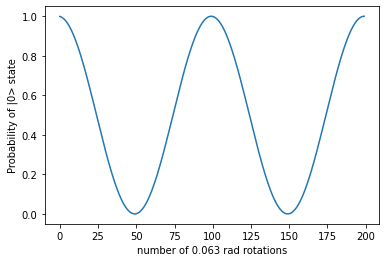

In [5]:
results = []

for step in sim.simulate_moment_steps(circuit):
    probs = np.abs(step.state_vector())**2
    # append probs[0] for probability of |0>
    results.append(probs[0])
    
plt.plot(results)
plt.xlabel('number of {:.3f} rad rotations'.format(full_angle / steps))
plt.ylabel('Probability of |0> state')